In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import LabelData as lb
import random 

In [56]:
d1 = pd.read_csv('getVAAData_may6.csv')
d2 = pd.read_csv('Test_Data_may17.csv')
d3 = pd.read_csv('Validation_Data_may21.csv')
d4 = pd.read_csv('Validation_Data2_may21.csv')
d5 = pd.read_csv('Validation_Data3_may21.csv')


In [57]:
print (d1.shape)
print (d2.shape)
print (d4.shape)
# print re.shape

(290, 21)
(50000, 15)
(1000, 15)


In [58]:


def data_clean(df):
    df = df.drop('Unnamed: 0',1)
    df.rename(columns={"PreferedCollege": "PreferedSchool"}, inplace=True)
    l = lb.LabelData()
    labels = l.label_data(df)
    df['Rating'] = labels
    df['SummerPref'] = df['SummerPref'].str.lower()
    df['ActualSummerPref'] = df['SummerPref'].str.lower()
    rank = [-1,1,2,3,4,5]
    n = int(0.1 * df.shape[0])
    change = df.sample(n).index
    df.loc[change,'Rating'] = random.choice(rank)
    return df

def data_clean_original(d1):
    d1 = d1.drop('GeneratedPlanID',1)
    d1 = d1.drop('MathStarting',1)
    d1 = d1.drop('EnglishStarting',1)
    d1 = d1.drop('MachineScore',1)
    d1 = d1.drop('Unnamed: 0',1)
    d1 = d1.drop('CreditsPerQuarter',1)
    d1 = d1.drop('TotalNumberOfCourses',1)
    d1.rename(columns={"NumberCoreCoursesPerQuarter": "PreferedNumberofCore"}, inplace=True)
    d1['ActualSummerPref'] = d1['ActualSummerPref'].fillna('No')
# filling missing values with the mean of the distribution
    d1['PreferedNumberofCore'] = d1['PreferedNumberofCore'].fillna(4)
    d1['ActualNumberofCore'] = d1['ActualNumberofCore'].fillna(5.5)
    d1['englishSequenceBreak'] = d1['englishSequenceBreak'].fillna(65.1)
    d1['mathSequenceBreak'] = d1['mathSequenceBreak'].fillna(49.8)
    l = lb.LabelData()
    labels = l.label_data(d1)
    d1['Rating'] = labels
    d1['SummerPref'] = d1['SummerPref'].str.lower()
    d1['ActualSummerPref'] = d1['SummerPref'].str.lower()
    rank = [-1,1,2,3,4,5]
    n = int(0.1 * d1.shape[0])
    change = d1.sample(n).index
    d1.loc[change,'Rating'] = random.choice(rank)
    return d1

    

In [59]:
d1 = data_clean_original(d1)
d2 = data_clean(d2)
d3 = data_clean(d3)
d4 = data_clean(d4)
d5 = data_clean(d5)

In [102]:
def visualize_data(df):
    print (df.shape)
    print("Mean: ",df['Rating'].mean())
    print("Standard Deviation: ",df['Rating'].std())

    %matplotlib inline
    pd.crosstab(df['Rating'],df['Rating']).plot(kind='bar',stacked=True)
    plt.title('Rating Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    
    print (df.shape," PreferedNumberQuarters")
    print("Mean: ",df['PreferedNumberQuarters'].mean())
    print("Standard Deviation: ",df['PreferedNumberQuarters'].std())
    
    %matplotlib inline
    pd.crosstab(df['PreferedNumberQuarters'],df['PreferedNumberQuarters']).plot(kind='bar',stacked=True)
    plt.title('PreferedNumberQuarters Distribution')
    plt.xlabel('PreferedNumberQuarters')
    plt.ylabel('Count')
    
    print (df.shape," PreferedNumberofCore")
    print("Mean: ",df['PreferedNumberofCore'].mean())
    print("Standard Deviation: ",df['PreferedNumberofCore'].std())
    
    %matplotlib inline
    pd.crosstab(df['PreferedNumberofCore'],df['PreferedNumberofCore']).plot(kind='bar',stacked=True)
    plt.title('PreferedNumberofCore Distribution')
    plt.xlabel('PreferedNumberofCore')
    plt.ylabel('Count')
    
    print (df.shape," ActualNumberofCore")
    print("Mean: ",df['ActualNumberofCore'].mean())
    print("Standard Deviation: ",df['ActualNumberofCore'].std())
    
    %matplotlib inline
    pd.crosstab(df['ActualNumberofCore'],df['ActualNumberofCore']).plot(kind='bar',stacked=True)
    plt.title('ActualNumberofCore Distribution')
    plt.xlabel('ActualNumberofCore')
    plt.ylabel('Count')
    
    print (df.shape," ActualNumberQuarters")
    print("Mean: ",df['ActualNumberQuarters'].mean())
    print("Standard Deviation: ",df['ActualNumberQuarters'].std())
    
    %matplotlib inline
    pd.crosstab(df['ActualNumberQuarters'],df['ActualNumberQuarters']).plot(kind='bar',stacked=True)
    plt.title('ActualNumberQuarters Distribution')
    plt.xlabel('ActualNumberQuarters')
    plt.ylabel('Count')
    
    print (df.shape," mathSequenceBreak")
    print("Mean: ",df['mathSequenceBreak'].mean())
    print("Standard Deviation: ",df['mathSequenceBreak'].std())
    
#     %matplotlib inline
#     pd.crosstab(df['mathSequenceBreak'],df['mathSequenceBreak']).plot(kind='bar',stacked=True)
#     plt.title('mathSequenceBreak Distribution')
#     plt.xlabel('mathSequenceBreak')
#     plt.ylabel('Count')
    
    print (df.shape," englishSequenceBreak")
    print("Mean: ",df['englishSequenceBreak'].mean())
    print("Standard Deviation: ",df['englishSequenceBreak'].std())
    
#     %matplotlib inline
#     pd.crosstab(df['englishSequenceBreak'],df['englishSequenceBreak']).plot(kind='bar',stacked=True)
#     plt.title('englishSequenceBreak Distribution')
#     plt.xlabel('englishSequenceBreak')
#     plt.ylabel('Count')
    
    
    
#     df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
#            xlabelsize=8, ylabelsize=8, grid=False)    
#     plt.tight_layout(rect=(0, 0, 2, 2)) 

(290, 15)
Mean:  2.689655172413793
Standard Deviation:  1.005295607194783
(290, 15)  PreferedNumberQuarters
Mean:  6.424137931034482
Standard Deviation:  1.9587714482413539
(290, 15)  PreferedNumberofCore
Mean:  3.593103448275862
Standard Deviation:  0.8604863171859229
(290, 15)  ActualNumberofCore
Mean:  2.856896551724138
Standard Deviation:  1.3398486808335193
(290, 15)  ActualNumberQuarters
Mean:  3.317241379310345
Standard Deviation:  0.878055797234389
(290, 15)  mathSequenceBreak
Mean:  57.0379310344825
Standard Deviation:  24.12939332022571
(290, 15)  englishSequenceBreak
Mean:  71.48551724137933
Standard Deviation:  21.716761116689458


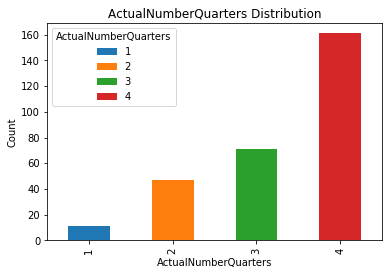

In [103]:
visualize_data(d1)


(50000, 15)
Mean:  2.2611
Standard Deviation:  1.469043890358296
(50000, 15)  PreferedNumberQuarters
Mean:  15.47164
Standard Deviation:  8.66036810706762
(50000, 15)  PreferedNumberofCore
Mean:  3.49838
Standard Deviation:  1.704739129107315
(50000, 15)  ActualNumberofCore
Mean:  3.51472
Standard Deviation:  2.2872708527323233
(50000, 15)  ActualNumberQuarters
Mean:  15.54868
Standard Deviation:  8.67219547733324
(50000, 15)  mathSequenceBreak
Mean:  50.19682
Standard Deviation:  29.19113434476425
(50000, 15)  englishSequenceBreak
Mean:  64.99114
Standard Deviation:  20.502396651752004


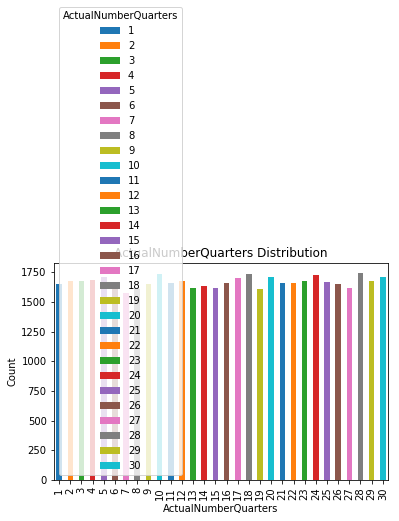

In [104]:
visualize_data(d2)


(500, 15)
Mean:  2.452
Standard Deviation:  1.7010240932837744
(500, 15)  PreferedNumberQuarters
Mean:  16.044
Standard Deviation:  8.881657033646741
(500, 15)  PreferedNumberofCore
Mean:  3.444
Standard Deviation:  1.7218575978211301
(500, 15)  ActualNumberofCore
Mean:  3.386
Standard Deviation:  2.32029557235413
(500, 15)  ActualNumberQuarters
Mean:  15.55
Standard Deviation:  8.754472089345322
(500, 15)  mathSequenceBreak
Mean:  49.96
Standard Deviation:  28.78874752343241
(500, 15)  englishSequenceBreak
Mean:  65.04
Standard Deviation:  20.70042064378546


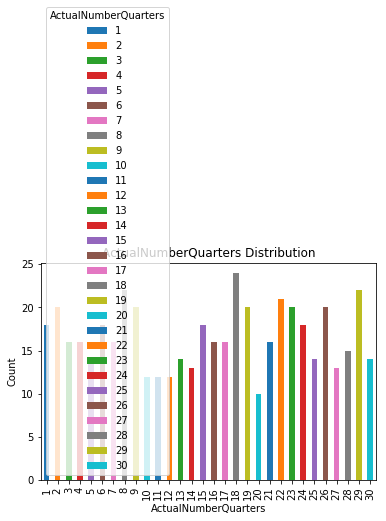

In [105]:
visualize_data(d3)


(1000, 15)
Mean:  2.201
Standard Deviation:  1.5069405661371884
(1000, 15)  PreferedNumberQuarters
Mean:  15.125
Standard Deviation:  8.755342999050981
(1000, 15)  PreferedNumberofCore
Mean:  3.564
Standard Deviation:  1.7055242046986034
(1000, 15)  ActualNumberofCore
Mean:  3.485
Standard Deviation:  2.3343573471566486
(1000, 15)  ActualNumberQuarters
Mean:  15.514
Standard Deviation:  8.721230639299938
(1000, 15)  mathSequenceBreak
Mean:  50.596
Standard Deviation:  30.052586277090043
(1000, 15)  englishSequenceBreak
Mean:  65.121
Standard Deviation:  20.529925397741636


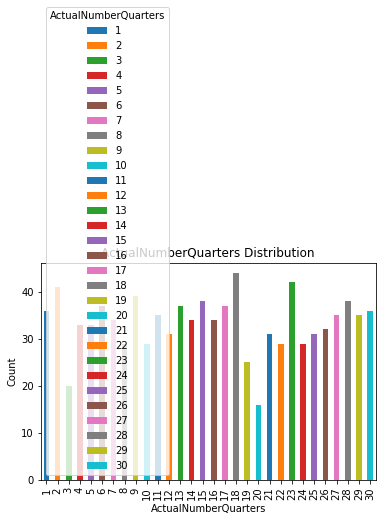

In [106]:
visualize_data(d4)


(10000, 15)
Mean:  2.3568
Standard Deviation:  1.5594668812435108
(10000, 15)  PreferedNumberQuarters
Mean:  15.6173
Standard Deviation:  8.607058083624475
(10000, 15)  PreferedNumberofCore
Mean:  3.4717
Standard Deviation:  1.707715063783593
(10000, 15)  ActualNumberofCore
Mean:  3.5085
Standard Deviation:  2.2887663915655763
(10000, 15)  ActualNumberQuarters
Mean:  15.509
Standard Deviation:  8.686522006330023
(10000, 15)  mathSequenceBreak
Mean:  50.1192
Standard Deviation:  29.094735635921797
(10000, 15)  englishSequenceBreak
Mean:  64.7342
Standard Deviation:  20.591977887403885


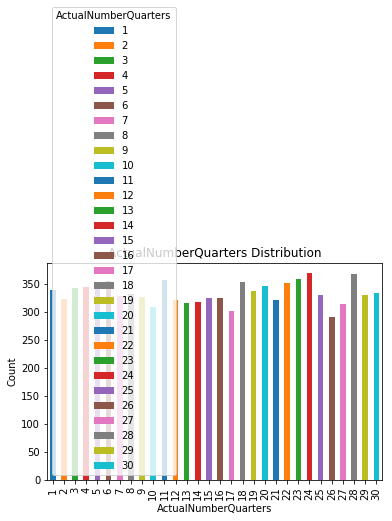

In [107]:
visualize_data(d5)

In [31]:
print ("Original===",d1.columns)
print ("Synthetic====",d3.columns)

Original=== Index(['PreferedMajor', 'PreferedSchool', 'JobType', 'PreferedStartQuarter',
       'ActualStartQuarter', 'PreferedNumberofCore', 'ActualNumberofCore',
       'PreferedNumberQuarters', 'ActualNumberQuarters', 'SummerPref',
       'ActualSummerPref', 'EnrollmentType', 'mathSequenceBreak',
       'englishSequenceBreak', 'Rating'],
      dtype='object')
Synthetic==== Index(['PreferedMajor', 'PreferedSchool', 'JobType', 'EnrollmentType',
       'PreferedStartQuarter', 'ActualStartQuarter', 'PreferedNumberQuarters',
       'ActualNumberQuarters', 'PreferedNumberofCore', 'ActualNumberofCore',
       'SummerPref', 'ActualSummerPref', 'mathSequenceBreak',
       'englishSequenceBreak', 'Rating'],
      dtype='object')


In [32]:


print (d2.shape)
# df = dataset.append(dataset2)

# df = dataset
# # df = df.drop('Rating',1)
# print(df.shape)

(290, 15)
(50000, 15)


In [9]:
dataset.describe(include='all')

,PreferedMajor,PreferedSchool,JobType,PreferedStartQuarter,ActualStartQuarter,PreferedNumberofCore,ActualNumberofCore,PreferedNumberQuarters,ActualNumberQuarters,SummerPref,ActualSummerPref,EnrollmentType,mathSequenceBreak,englishSequenceBreak
count,290,290,290,290,290,84.000000,275.000000,290.000000,290.000000,290,170,290,160.00000,142.000000
unique,15,6,3,4,3,NaN,NaN,NaN,NaN,4,1,2,NaN,NaN
top,Mechanical Engineering,Washington State University,Part Time,Fall,Fall,NaN,NaN,NaN,NaN,Yes,Yes,Full Time,NaN,NaN
freq,155,194,139,102,257,NaN,NaN,NaN,NaN,167,170,201,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.595238,2.712727,6.424138,3.317241,NaN,NaN,NaN,62.91875,78.140845
std,NaN,NaN,NaN,NaN,NaN,1.076799,1.220724,1.958771,0.878056,NaN,NaN,NaN,31.31499,29.652022
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,0.00000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,6.000000,3.000000,NaN,NaN,NaN,50.75000,72.000000
50%,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000,6.000000,4.000000,NaN,NaN,NaN,68.00000,92.000000
75%,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,6.000000,4.000000,NaN,NaN,NaN,89.00000,100.000000


In [25]:

print (d1.isnull().sum()) ## checking for missing values

PreferedMajor             0
PreferedSchool            0
JobType                   0
PreferedStartQuarter      0
ActualStartQuarter        0
PreferedNumberofCore      0
ActualNumberofCore        0
PreferedNumberQuarters    0
ActualNumberQuarters      0
SummerPref                0
ActualSummerPref          0
EnrollmentType            0
mathSequenceBreak         0
englishSequenceBreak      0
dtype: int64


290


In [17]:
df.describe(include='all')

,PreferedMajor,PreferedSchool,JobType,PreferedStartQuarter,ActualStartQuarter,PreferedNumberofCore,ActualNumberofCore,PreferedNumberQuarters,ActualNumberQuarters,SummerPref,ActualSummerPref,EnrollmentType,mathSequenceBreak,englishSequenceBreak,Rating
count,290,290,290,290,290,290.000000,290.000000,290.000000,290.000000,290,290,290,290.000000,290.000000,290.000000
unique,15,6,3,4,3,NaN,NaN,NaN,NaN,4,2,2,NaN,NaN,NaN
top,Mechanical Engineering,Washington State University,Part Time,Fall,Fall,NaN,NaN,NaN,NaN,Yes,Yes,Full Time,NaN,NaN,NaN
freq,155,194,139,102,257,NaN,NaN,NaN,NaN,167,170,201,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.237931,2.753448,6.424138,3.317241,NaN,NaN,NaN,57.037931,71.485517,2.637931
std,NaN,NaN,NaN,NaN,NaN,0.708531,1.201386,1.958771,0.878056,NaN,NaN,NaN,24.129393,21.716761,1.057160
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,3.000000,1.000000,6.000000,3.000000,NaN,NaN,NaN,49.800000,65.100000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,3.500000,3.000000,6.000000,4.000000,NaN,NaN,NaN,49.800000,65.100000,2.500000
75%,NaN,NaN,NaN,NaN,NaN,3.500000,4.000000,6.000000,4.000000,NaN,NaN,NaN,71.000000,82.250000,3.000000


In [18]:

df.describe(include='all')

,PreferedMajor,PreferedSchool,JobType,PreferedStartQuarter,ActualStartQuarter,PreferedNumberofCore,ActualNumberofCore,PreferedNumberQuarters,ActualNumberQuarters,SummerPref,ActualSummerPref,EnrollmentType,mathSequenceBreak,englishSequenceBreak,Rating
count,290,290,290,290,290,290.000000,290.000000,290.000000,290.000000,290,290,290,290.000000,290.000000,290.000000
unique,15,6,3,4,3,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN,NaN
top,Mechanical Engineering,Washington State University,Part Time,Fall,Fall,NaN,NaN,NaN,NaN,yes,yes,Full Time,NaN,NaN,NaN
freq,155,194,139,102,257,NaN,NaN,NaN,NaN,174,174,201,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.237931,2.753448,6.424138,3.317241,NaN,NaN,NaN,57.037931,71.485517,2.637931
std,NaN,NaN,NaN,NaN,NaN,0.708531,1.201386,1.958771,0.878056,NaN,NaN,NaN,24.129393,21.716761,1.057160
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,3.000000,1.000000,6.000000,3.000000,NaN,NaN,NaN,49.800000,65.100000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,3.500000,3.000000,6.000000,4.000000,NaN,NaN,NaN,49.800000,65.100000,2.500000
75%,NaN,NaN,NaN,NaN,NaN,3.500000,4.000000,6.000000,4.000000,NaN,NaN,NaN,71.000000,82.250000,3.000000


Mean:  2.6379310344827585
Standard Deviation:  1.057160063600394
Mean:  2.6379310344827585
Standard Deviation:  1.057160063600394


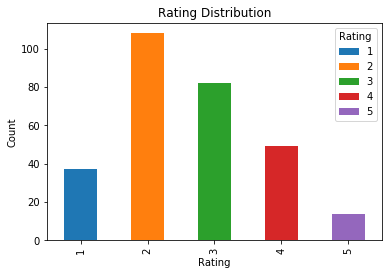

In [19]:
print("Mean: ",df['Rating'].mean())
print("Standard Deviation: ",df['Rating'].std())

%matplotlib inline
pd.crosstab(df['Rating'],df['Rating']).plot(kind='bar',stacked=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')


print("Mean: ",df['Rating'].mean())
print("Standard Deviation: ",df['Rating'].std())

In [22]:
df.describe(include='all')

,PreferedMajor,PreferedSchool,JobType,PreferedStartQuarter,ActualStartQuarter,PreferedNumberofCore,ActualNumberofCore,PreferedNumberQuarters,ActualNumberQuarters,SummerPref,ActualSummerPref,EnrollmentType,mathSequenceBreak,englishSequenceBreak,Rating
count,290,290,290,290,290,290.000000,290.000000,290.000000,290.000000,290,290,290,290.000000,290.000000,290.000000
unique,15,6,3,4,3,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN,NaN
top,Mechanical Engineering,Washington State University,Part Time,Fall,Fall,NaN,NaN,NaN,NaN,yes,yes,Full Time,NaN,NaN,NaN
freq,155,194,139,102,257,NaN,NaN,NaN,NaN,174,174,201,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.237931,2.753448,6.424138,3.317241,NaN,NaN,NaN,57.037931,71.485517,2.700000
std,NaN,NaN,NaN,NaN,NaN,0.708531,1.201386,1.958771,0.878056,NaN,NaN,NaN,24.129393,21.716761,0.924297
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,3.000000,1.000000,6.000000,3.000000,NaN,NaN,NaN,49.800000,65.100000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,3.500000,3.000000,6.000000,4.000000,NaN,NaN,NaN,49.800000,65.100000,3.000000
75%,NaN,NaN,NaN,NaN,NaN,3.500000,4.000000,6.000000,4.000000,NaN,NaN,NaN,71.000000,82.250000,3.000000


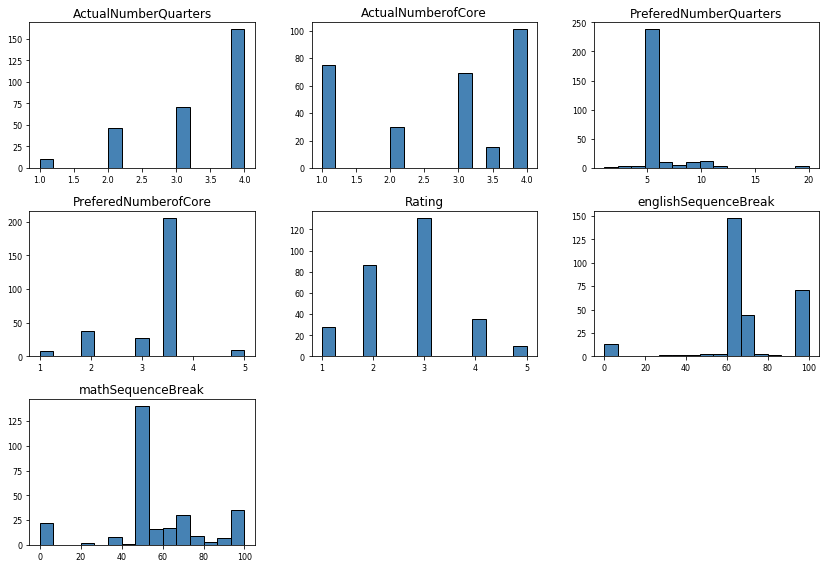

In [23]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))  

In [24]:
# df.to_csv("Error_test_may17.csv")

Mean:  2.7
Standard Deviation:  0.9242971705655999


Text(0,0.5,'Count')

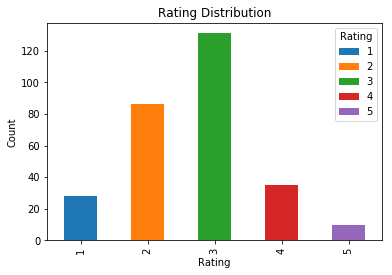

In [25]:
print("Mean: ",df['Rating'].mean())
print("Standard Deviation: ",df['Rating'].std())

%matplotlib inline
pd.crosstab(df['Rating'],df['Rating']).plot(kind='bar',stacked=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

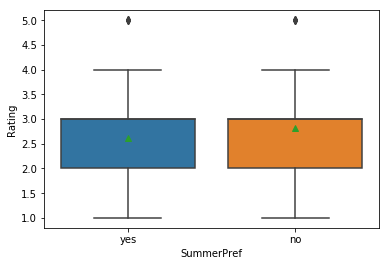

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['SummerPref'].str.lower(), y=df['Rating'], showmeans=True)
plt.show()

Mean:  2.7
Standard Deviation:  0.9242971705655999


Text(0,0.5,'Count')

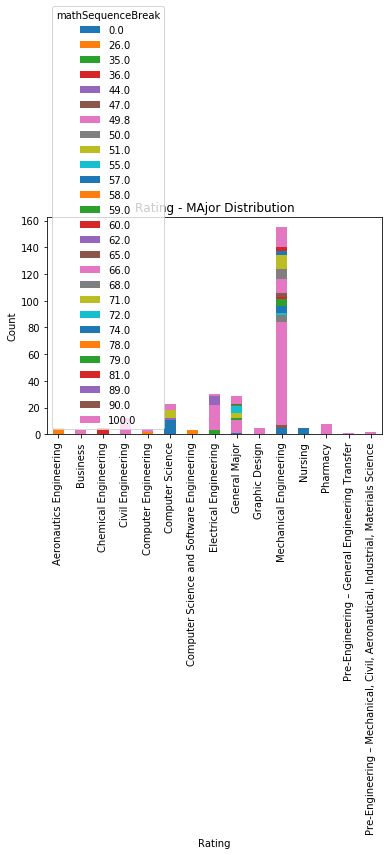

In [27]:
print("Mean: ",df['Rating'].mean())
print("Standard Deviation: ",df['Rating'].std())

%matplotlib inline
pd.crosstab(df['PreferedMajor'],df['mathSequenceBreak']).plot(kind='bar',stacked=True)
plt.title('Rating - MAjor Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

Mean:  2.7
Standard Deviation:  0.9242971705655999


Text(0,0.5,'Count')

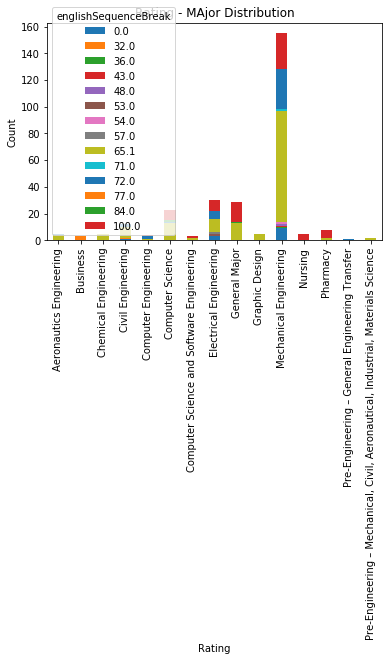

In [28]:
print("Mean: ",df['Rating'].mean())
print("Standard Deviation: ",df['Rating'].std())

%matplotlib inline
pd.crosstab(df['PreferedMajor'],df['englishSequenceBreak']).plot(kind='bar',stacked=True)
plt.title('Rating - MAjor Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

,PreferedNumberofCore,ActualNumberofCore,PreferedNumberQuarters,ActualNumberQuarters,mathSequenceBreak,englishSequenceBreak,Rating
PreferedNumberofCore,1.000000,-0.195071,-0.060499,-0.269137,0.111333,0.332921,0.075027
ActualNumberofCore,-0.195071,1.000000,0.224715,0.669756,-0.233105,-0.109911,-0.107349
PreferedNumberQuarters,-0.060499,0.224715,1.000000,0.164930,-0.065177,-0.132396,-0.080462
ActualNumberQuarters,-0.269137,0.669756,0.164930,1.000000,0.010242,-0.102593,0.092092
mathSequenceBreak,0.111333,-0.233105,-0.065177,0.010242,1.000000,0.019010,0.632768
englishSequenceBreak,0.332921,-0.109911,-0.132396,-0.102593,0.019010,1.000000,0.266098
Rating,0.075027,-0.107349,-0.080462,0.092092,0.632768,0.266098,1.000000


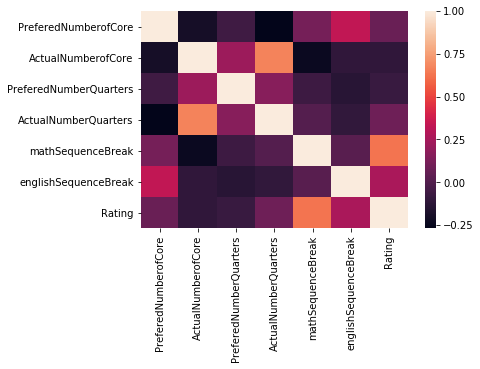

In [29]:
display(df.corr())
corr=df.corr();

sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns);

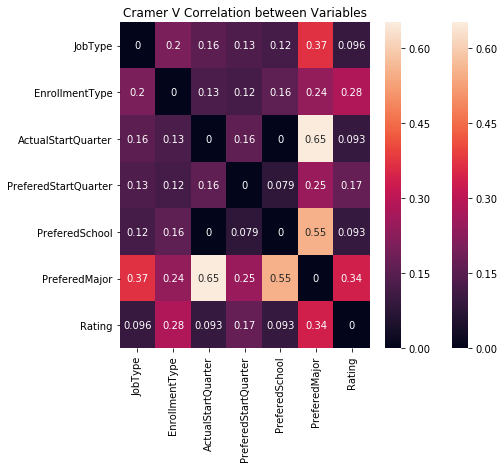

In [30]:
import scipy.stats as ss
import itertools   
# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x,y)
#     chi2 = ss.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2/n
#     r,k = confusion_matrix.shape
#     phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
#     rcorr = r-((r-1)**2)/(n-1)
#     kcorr = k-((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
import pandas as pd


# https://stackoverflow.com/questions/51859894/how-to-plot-a-cramer-s-v-heatmap-for-categorical-features
cols = ["JobType", "EnrollmentType", "ActualStartQuarter","PreferedStartQuarter","PreferedSchool","PreferedMajor","Rating"]
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]
# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns);
# print(confusion_matrix)

In [31]:
df['JobType'] =df['JobType'].astype('category').cat.codes
df['EnrollmentType'] =df['EnrollmentType'].astype('category').cat.codes
df['ActualStartQuarter'] =df['ActualStartQuarter'].astype('category').cat.codes
df['PreferedStartQuarter'] =df['PreferedStartQuarter'].astype('category').cat.codes
df['PreferedSchool'] =df['PreferedSchool'].astype('category').cat.codes
df['PreferedMajor'] =df['PreferedMajor'].astype('category').cat.codes
df['Rating'] =df['Rating'].astype('category').cat.codes



,PreferedMajor,PreferedSchool,JobType,PreferedStartQuarter,ActualStartQuarter,PreferedNumberofCore,ActualNumberofCore,PreferedNumberQuarters,ActualNumberQuarters,EnrollmentType,mathSequenceBreak,englishSequenceBreak,Rating
PreferedMajor,1.000000,0.149612,0.168421,0.098324,0.008331,-0.006243,-0.230066,-0.135404,-0.068377,0.213600,0.138418,0.030285,0.156492
PreferedSchool,0.149612,1.000000,-0.066421,-0.036882,0.063721,0.234997,-0.069964,0.065884,-0.066638,0.089792,0.113065,0.121700,0.113952
JobType,0.168421,-0.066421,1.000000,0.180399,0.196277,-0.066863,-0.098603,-0.079131,-0.111973,-0.027227,-0.056139,-0.034624,-0.094908
PreferedStartQuarter,0.098324,-0.036882,0.180399,1.000000,0.199294,-0.221143,0.045978,0.002921,0.053782,0.046923,0.003355,0.093653,0.057579
ActualStartQuarter,0.008331,0.063721,0.196277,0.199294,1.000000,0.034795,-0.396926,-0.159252,-0.618380,0.121098,0.140703,0.088328,0.088400
PreferedNumberofCore,-0.006243,0.234997,-0.066863,-0.221143,0.034795,1.000000,-0.195071,-0.060499,-0.269137,-0.007144,0.111333,0.332921,0.075027
ActualNumberofCore,-0.230066,-0.069964,-0.098603,0.045978,-0.396926,-0.195071,1.000000,0.224715,0.669756,-0.168676,-0.233105,-0.109911,-0.107349
PreferedNumberQuarters,-0.135404,0.065884,-0.079131,0.002921,-0.159252,-0.060499,0.224715,1.000000,0.164930,-0.052568,-0.065177,-0.132396,-0.080462
ActualNumberQuarters,-0.068377,-0.066638,-0.111973,0.053782,-0.618380,-0.269137,0.669756,0.164930,1.000000,-0.189654,0.010242,-0.102593,0.092092
EnrollmentType,0.213600,0.089792,-0.027227,0.046923,0.121098,-0.007144,-0.168676,-0.052568,-0.189654,1.000000,0.074005,-0.078808,-0.034843


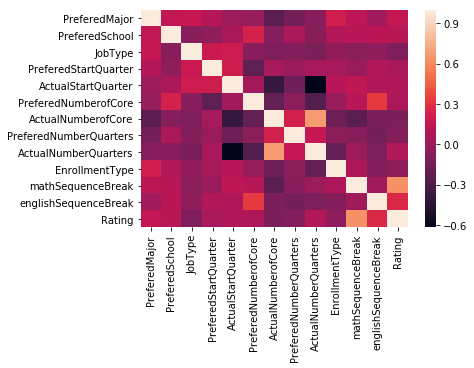

In [32]:
display(df.corr())
corr=df.corr();

sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns);

In [82]:

# re.Rating = re.Rating.astype(str).astype(int)
# re.LengthInQtr = re.LengthInQtr.astype(str).astype(int)
# re.QtrsWithoutCRSE = re.QtrsWithoutCRSE.astype(str).astype(int)
# re.QtrsWithCRSE =re.QtrsWithCRSE.astype(str).astype(int)
# dataset.NmbrOfCRSE = re.NmbrOfCRSE.astype(str).astype(int)
# # dataset.PrefDayNight = dataset.PrefDayNight.astype(str).astype(long)
# re.StdntType = re.StdntType.astype(str).astype(int)
# re.PrefCoreCRSEPerQtr = re.PrefCoreCRSEPerQtr.astype(str).astype(int)
# re.dtypes

In [83]:
## Our data has a few null values but a lot of categorical data. We want to make the most of the categorical data. 
## Simple conversion of out categorical data into numerical data using onehotencoder to avoid ordinality in the data.
# This has an issue that the feature space may increase. And hence we can go ahead with PCA to reduce the features.

In [141]:
from imblearn.over_sampling import RandomOverSampler

In [142]:
# X_res = df
# X_res = X_res.drop('Rating',1)
# Y_res = df['Rating']
# ros = RandomOverSampler(random_state=42)
# X_res, y_res = ros.fit_sample(X_res,Y_res)

In [33]:
one_hot_encoded= pd.get_dummies(df)
one_hot_encoded.to_csv("Error_50k+test+10e_may18.csv")

# print(one_hot_encoded)

,PreferedMajor,PreferedSchool,JobType,PreferedStartQuarter,ActualStartQuarter,PreferedNumberofCore,ActualNumberofCore,PreferedNumberQuarters,ActualNumberQuarters,EnrollmentType,mathSequenceBreak,englishSequenceBreak,Rating,SummerPref_no,SummerPref_yes,ActualSummerPref_no,ActualSummerPref_yes
PreferedMajor,1.000000,0.149612,0.168421,0.098324,0.008331,-0.006243,-0.230066,-0.135404,-0.068377,0.213600,0.138418,0.030285,0.156492,0.037006,-0.037006,0.037006,-0.037006
PreferedSchool,0.149612,1.000000,-0.066421,-0.036882,0.063721,0.234997,-0.069964,0.065884,-0.066638,0.089792,0.113065,0.121700,0.113952,0.224331,-0.224331,0.224331,-0.224331
JobType,0.168421,-0.066421,1.000000,0.180399,0.196277,-0.066863,-0.098603,-0.079131,-0.111973,-0.027227,-0.056139,-0.034624,-0.094908,-0.181686,0.181686,-0.181686,0.181686
PreferedStartQuarter,0.098324,-0.036882,0.180399,1.000000,0.199294,-0.221143,0.045978,0.002921,0.053782,0.046923,0.003355,0.093653,0.057579,-0.073072,0.073072,-0.073072,0.073072
ActualStartQuarter,0.008331,0.063721,0.196277,0.199294,1.000000,0.034795,-0.396926,-0.159252,-0.618380,0.121098,0.140703,0.088328,0.088400,-0.047571,0.047571,-0.047571,0.047571
PreferedNumberofCore,-0.006243,0.234997,-0.066863,-0.221143,0.034795,1.000000,-0.195071,-0.060499,-0.269137,-0.007144,0.111333,0.332921,0.075027,0.173156,-0.173156,0.173156,-0.173156
ActualNumberofCore,-0.230066,-0.069964,-0.098603,0.045978,-0.396926,-0.195071,1.000000,0.224715,0.669756,-0.168676,-0.233105,-0.109911,-0.107349,-0.099186,0.099186,-0.099186,0.099186
PreferedNumberQuarters,-0.135404,0.065884,-0.079131,0.002921,-0.159252,-0.060499,0.224715,1.000000,0.164930,-0.052568,-0.065177,-0.132396,-0.080462,-0.076313,0.076313,-0.076313,0.076313
ActualNumberQuarters,-0.068377,-0.066638,-0.111973,0.053782,-0.618380,-0.269137,0.669756,0.164930,1.000000,-0.189654,0.010242,-0.102593,0.092092,-0.207178,0.207178,-0.207178,0.207178
EnrollmentType,0.213600,0.089792,-0.027227,0.046923,0.121098,-0.007144,-0.168676,-0.052568,-0.189654,1.000000,0.074005,-0.078808,-0.034843,0.006105,-0.006105,0.006105,-0.006105


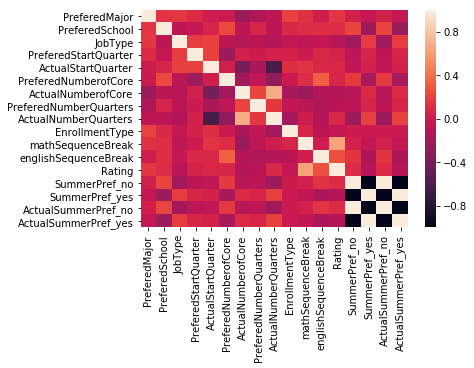

In [34]:
display(one_hot_encoded.corr())
corr=one_hot_encoded.corr();

sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns);

In [35]:
from sklearn import preprocessing

In [36]:
scaler = preprocessing.StandardScaler().fit(one_hot_encoded)
scaler


StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
# scaler.mean_

In [38]:
# scaler.scale_

In [39]:
X = scaler.transform(one_hot_encoded)  
df = pd.DataFrame(X)
# df.to_csv("Standardized_format_Nov19.csv")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,0.149612,0.168421,0.098324,0.008331,-0.006243,-0.230066,-0.135404,-0.068377,0.213600,0.138418,0.030285,0.156492,0.037006,-0.037006,0.037006,-0.037006
1,0.149612,1.000000,-0.066421,-0.036882,0.063721,0.234997,-0.069964,0.065884,-0.066638,0.089792,0.113065,0.121700,0.113952,0.224331,-0.224331,0.224331,-0.224331
2,0.168421,-0.066421,1.000000,0.180399,0.196277,-0.066863,-0.098603,-0.079131,-0.111973,-0.027227,-0.056139,-0.034624,-0.094908,-0.181686,0.181686,-0.181686,0.181686
3,0.098324,-0.036882,0.180399,1.000000,0.199294,-0.221143,0.045978,0.002921,0.053782,0.046923,0.003355,0.093653,0.057579,-0.073072,0.073072,-0.073072,0.073072
4,0.008331,0.063721,0.196277,0.199294,1.000000,0.034795,-0.396926,-0.159252,-0.618380,0.121098,0.140703,0.088328,0.088400,-0.047571,0.047571,-0.047571,0.047571
5,-0.006243,0.234997,-0.066863,-0.221143,0.034795,1.000000,-0.195071,-0.060499,-0.269137,-0.007144,0.111333,0.332921,0.075027,0.173156,-0.173156,0.173156,-0.173156
6,-0.230066,-0.069964,-0.098603,0.045978,-0.396926,-0.195071,1.000000,0.224715,0.669756,-0.168676,-0.233105,-0.109911,-0.107349,-0.099186,0.099186,-0.099186,0.099186
7,-0.135404,0.065884,-0.079131,0.002921,-0.159252,-0.060499,0.224715,1.000000,0.164930,-0.052568,-0.065177,-0.132396,-0.080462,-0.076313,0.076313,-0.076313,0.076313
8,-0.068377,-0.066638,-0.111973,0.053782,-0.618380,-0.269137,0.669756,0.164930,1.000000,-0.189654,0.010242,-0.102593,0.092092,-0.207178,0.207178,-0.207178,0.207178
9,0.213600,0.089792,-0.027227,0.046923,0.121098,-0.007144,-0.168676,-0.052568,-0.189654,1.000000,0.074005,-0.078808,-0.034843,0.006105,-0.006105,0.006105,-0.006105


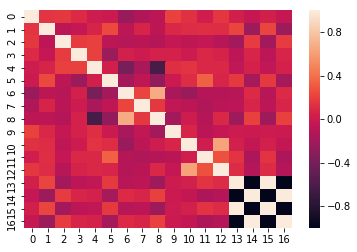

In [40]:
display(df.corr())
corr=df.corr();

sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns);

In [149]:
# normalizer = preprocessing.Normalizer().fit_transform(one_hot_encoded)
# # X_normal = normalizer.transform(one_hot_encoded)
# df = pd.DataFrame(X_normal)
normalizer = preprocessing.Normalizer(norm='l2')

df = pd.DataFrame(normalizer.fit_transform(one_hot_encoded),columns=one_hot_encoded.columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,0.149612,0.168421,0.098324,0.008331,-0.006243,-0.230066,-0.135404,-0.068377,0.213600,0.138418,0.030285,0.156492,0.037006,-0.037006,0.037006,-0.037006
1,0.149612,1.000000,-0.066421,-0.036882,0.063721,0.234997,-0.069964,0.065884,-0.066638,0.089792,0.113065,0.121700,0.113952,0.224331,-0.224331,0.224331,-0.224331
2,0.168421,-0.066421,1.000000,0.180399,0.196277,-0.066863,-0.098603,-0.079131,-0.111973,-0.027227,-0.056139,-0.034624,-0.094908,-0.181686,0.181686,-0.181686,0.181686
3,0.098324,-0.036882,0.180399,1.000000,0.199294,-0.221143,0.045978,0.002921,0.053782,0.046923,0.003355,0.093653,0.057579,-0.073072,0.073072,-0.073072,0.073072
4,0.008331,0.063721,0.196277,0.199294,1.000000,0.034795,-0.396926,-0.159252,-0.618380,0.121098,0.140703,0.088328,0.088400,-0.047571,0.047571,-0.047571,0.047571
5,-0.006243,0.234997,-0.066863,-0.221143,0.034795,1.000000,-0.195071,-0.060499,-0.269137,-0.007144,0.111333,0.332921,0.075027,0.173156,-0.173156,0.173156,-0.173156
6,-0.230066,-0.069964,-0.098603,0.045978,-0.396926,-0.195071,1.000000,0.224715,0.669756,-0.168676,-0.233105,-0.109911,-0.107349,-0.099186,0.099186,-0.099186,0.099186
7,-0.135404,0.065884,-0.079131,0.002921,-0.159252,-0.060499,0.224715,1.000000,0.164930,-0.052568,-0.065177,-0.132396,-0.080462,-0.076313,0.076313,-0.076313,0.076313
8,-0.068377,-0.066638,-0.111973,0.053782,-0.618380,-0.269137,0.669756,0.164930,1.000000,-0.189654,0.010242,-0.102593,0.092092,-0.207178,0.207178,-0.207178,0.207178
9,0.213600,0.089792,-0.027227,0.046923,0.121098,-0.007144,-0.168676,-0.052568,-0.189654,1.000000,0.074005,-0.078808,-0.034843,0.006105,-0.006105,0.006105,-0.006105


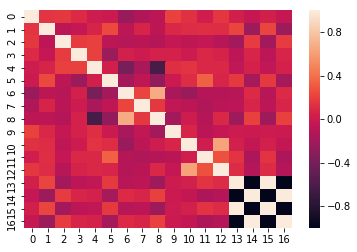

In [41]:
display(df.corr())
corr=df.corr();

sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns);

In [44]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = pd.DataFrame(min_max_scaler.fit_transform(one_hot_encoded))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,0.149612,0.168421,0.098324,0.008331,-0.006243,-0.230066,-0.135404,-0.068377,0.213600,0.138418,0.030285,0.156492,0.037006,-0.037006,0.037006,-0.037006
1,0.149612,1.000000,-0.066421,-0.036882,0.063721,0.234997,-0.069964,0.065884,-0.066638,0.089792,0.113065,0.121700,0.113952,0.224331,-0.224331,0.224331,-0.224331
2,0.168421,-0.066421,1.000000,0.180399,0.196277,-0.066863,-0.098603,-0.079131,-0.111973,-0.027227,-0.056139,-0.034624,-0.094908,-0.181686,0.181686,-0.181686,0.181686
3,0.098324,-0.036882,0.180399,1.000000,0.199294,-0.221143,0.045978,0.002921,0.053782,0.046923,0.003355,0.093653,0.057579,-0.073072,0.073072,-0.073072,0.073072
4,0.008331,0.063721,0.196277,0.199294,1.000000,0.034795,-0.396926,-0.159252,-0.618380,0.121098,0.140703,0.088328,0.088400,-0.047571,0.047571,-0.047571,0.047571
5,-0.006243,0.234997,-0.066863,-0.221143,0.034795,1.000000,-0.195071,-0.060499,-0.269137,-0.007144,0.111333,0.332921,0.075027,0.173156,-0.173156,0.173156,-0.173156
6,-0.230066,-0.069964,-0.098603,0.045978,-0.396926,-0.195071,1.000000,0.224715,0.669756,-0.168676,-0.233105,-0.109911,-0.107349,-0.099186,0.099186,-0.099186,0.099186
7,-0.135404,0.065884,-0.079131,0.002921,-0.159252,-0.060499,0.224715,1.000000,0.164930,-0.052568,-0.065177,-0.132396,-0.080462,-0.076313,0.076313,-0.076313,0.076313
8,-0.068377,-0.066638,-0.111973,0.053782,-0.618380,-0.269137,0.669756,0.164930,1.000000,-0.189654,0.010242,-0.102593,0.092092,-0.207178,0.207178,-0.207178,0.207178
9,0.213600,0.089792,-0.027227,0.046923,0.121098,-0.007144,-0.168676,-0.052568,-0.189654,1.000000,0.074005,-0.078808,-0.034843,0.006105,-0.006105,0.006105,-0.006105


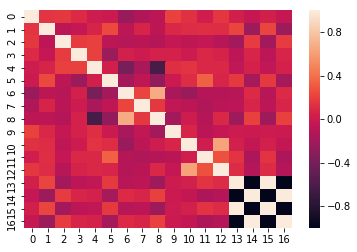

In [45]:
display(X_train_minmax.corr())
corr=X_train_minmax.corr();

sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns);

In [25]:
# df = pd.DataFrame(X_normal)

In [214]:
df.to_csv('Cleaned_may17.csv')